
New York City Taxi Trip Duration
Share code and data to improve ride time predictions
 
A ride-sharing company operates thousands of taxi rides every day in New York City.
Problems they face:
Pickup locations are not categorized
Some areas are very crowded, some are rarely used
GPS data contains noise (random, one-time pickups)
Demand hotspots change dynamically
The company wants to:
Discover natural pickup hotspots
Ignore random or rare pickup points
Understand high-density demand zones
Improve:
Driver allocation
Surge pricing
Route planning
They hire you as a Data Scientist to analyze pickup locations and identify natural demand clusters, without knowing how many hotspots exist.
 
1️⃣ Load the Dataset
Load the CSV file into a pandas DataFrame.
Display the first 5 rows of the dataset.

2️⃣ Feature Selection
Extract the following columns:
pickup_latitude
pickup_longitude
Store them in a variable named X.

3️⃣ Data Preprocessing
Apply StandardScaler to scale the selected features.
Store the scaled data in X_scaled.

1️⃣ Load the Dataset
Load the CSV file into a pandas DataFrame.
Display the first 5 rows of the dataset.

2️⃣ Feature Selection
Extract the following columns:
pickup_latitude
pickup_longitude
Store them in a variable named X.

3️⃣ Data Preprocessing
Apply StandardScaler to scale the selected features.
Store the scaled data in X_scaled.

4️⃣ DBSCAN Model – Experiment 1
Apply DBSCAN with:
eps = 0.2
min_samples = 5
Store cluster labels in labels_1.

5️⃣ DBSCAN Model – Experiment 2
Apply DBSCAN with:
eps = 0.3
min_samples = 5
Store cluster labels in labels_2.

6️⃣ DBSCAN Model – Experiment 3
Apply DBSCAN with:
eps = 0.5
min_samples = 5
Store cluster labels in labels_3.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('NewYorkCityTaxiTripDuration.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
x=df[['pickup_longitude','pickup_latitude']]


In [4]:
from sklearn.preprocessing import StandardScaler
x_sample = x.sample(n=20000, random_state=42)
sc=StandardScaler()
x_scaled=sc.fit_transform(x_sample)

In [5]:
from sklearn.cluster import DBSCAN
db1=DBSCAN(eps=0.2,min_samples=5)
labels_1=db1.fit_predict(x_scaled)
db2 = DBSCAN(eps=0.3, min_samples=5)
labels_2 = db2.fit_predict(x_scaled)
db3 = DBSCAN(eps=0.5, min_samples=5)
labels_3 = db3.fit_predict(x_scaled)


7️⃣ Cluster Evaluation
For each experiment:
Print:
Number of clusters (excluding noise)
Number of noise points
Noise ratio

8️⃣ Silhouette Score Calculation
Remove noise points (-1) from each experiment.
Calculate and print the Silhouette Score for:
Experiment 1
Experiment 2
Experiment 3
If silhouette score is not applicable, print "Not Applicable".

9️⃣ Visualization
For each experiment:
Plot pickup locations using a scatter plot.
Color points based on cluster labels.
Highlight noise points using a separate color.

🔟 Best Model Selection
Based on:
Number of clusters
Noise ratio
Silhouette score
Print:
Best eps value = _

In [6]:
import numpy as np

def evaluate_clusters(labels, name):
    
    # Number of clusters (excluding noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    # Number of noise points
    n_noise = list(labels).count(-1)
    
    # Noise ratio
    noise_ratio = n_noise / len(labels)
    
    print(f"\n{name}")
    print("Number of clusters:", n_clusters)
    print("Number of noise points:", n_noise)
    print("Noise ratio:", round(noise_ratio, 4))
    
    return n_clusters, n_noise, noise_ratio


clusters1, noise1, ratio1 = evaluate_clusters(labels_1, "Experiment 1 (eps=0.2)")
clusters2, noise2, ratio2 = evaluate_clusters(labels_2, "Experiment 2 (eps=0.3)")
clusters3, noise3, ratio3 = evaluate_clusters(labels_3, "Experiment 3 (eps=0.5)")



Experiment 1 (eps=0.2)
Number of clusters: 11
Number of noise points: 97
Noise ratio: 0.0049

Experiment 2 (eps=0.3)
Number of clusters: 6
Number of noise points: 48
Noise ratio: 0.0024

Experiment 3 (eps=0.5)
Number of clusters: 3
Number of noise points: 28
Noise ratio: 0.0014


In [7]:
import numpy as np

def evaluate_clusters(labels, name):
    
    # Number of clusters (excluding noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    # Number of noise points
    n_noise = list(labels).count(-1)
    
    # Noise ratio
    noise_ratio = n_noise / len(labels)
    
    print(f"\n{name}")
    print("Number of clusters:", n_clusters)
    print("Number of noise points:", n_noise)
    print("Noise ratio:", round(noise_ratio, 4))
    
    return n_clusters, n_noise, noise_ratio


clusters1, noise1, ratio1 = evaluate_clusters(labels_1, "Experiment 1 (eps=0.2)")
clusters2, noise2, ratio2 = evaluate_clusters(labels_2, "Experiment 2 (eps=0.3)")
clusters3, noise3, ratio3 = evaluate_clusters(labels_3, "Experiment 3 (eps=0.5)")



Experiment 1 (eps=0.2)
Number of clusters: 11
Number of noise points: 97
Noise ratio: 0.0049

Experiment 2 (eps=0.3)
Number of clusters: 6
Number of noise points: 48
Noise ratio: 0.0024

Experiment 3 (eps=0.5)
Number of clusters: 3
Number of noise points: 28
Noise ratio: 0.0014


In [8]:
from sklearn.metrics import silhouette_score

def compute_silhouette(X, labels, name):
    
    mask = labels != -1   # remove noise
    
    if len(set(labels[mask])) > 1:
        score = silhouette_score(X[mask], labels[mask])
        print(f"{name} Silhouette Score:", round(score, 4))
        return score
    else:
        print(f"{name} Silhouette Score: Not Applicable")
        return None


score1 = compute_silhouette(x_scaled, labels_1, "Experiment 1")
score2 = compute_silhouette(x_scaled, labels_2, "Experiment 2")
score3 = compute_silhouette(x_scaled, labels_3, "Experiment 3")


Experiment 1 Silhouette Score: 0.2917
Experiment 2 Silhouette Score: 0.6321
Experiment 3 Silhouette Score: 0.7181


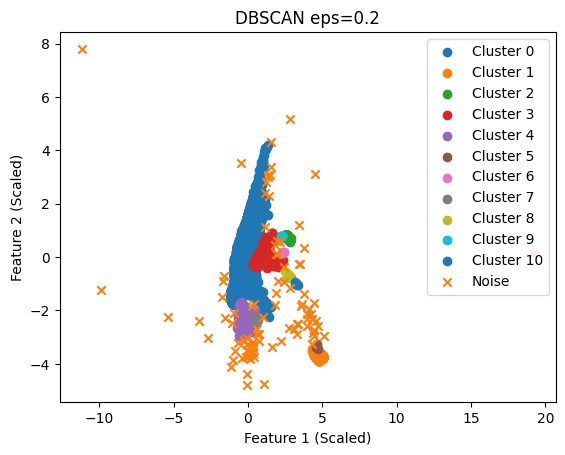

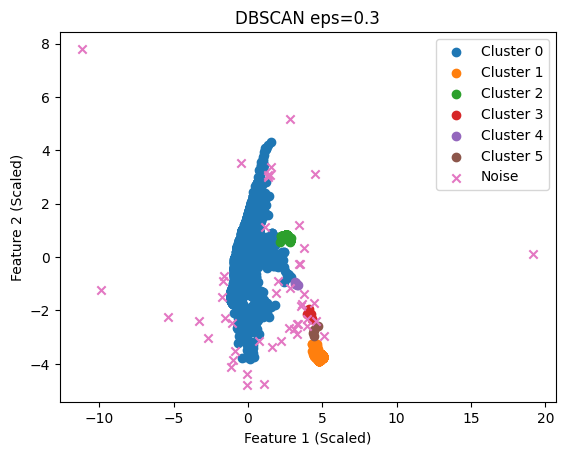

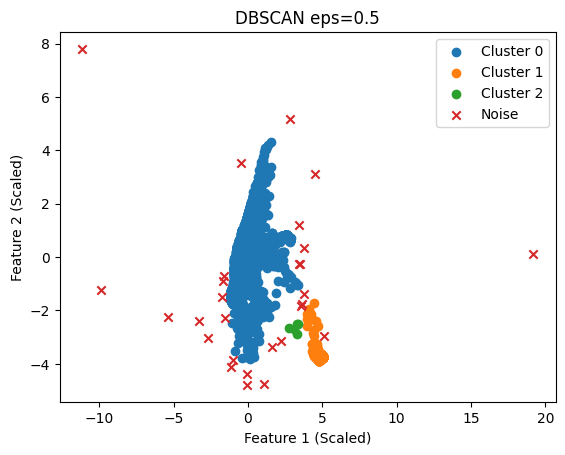

In [9]:
import matplotlib.pyplot as plt

def plot_dbscan(X, labels, title):
    
    plt.figure()
    
    unique_labels = set(labels)
    
    for label in unique_labels:
        if label == -1:
            plt.scatter(X[labels == -1, 0],
                        X[labels == -1, 1],
                        marker='x',
                        label='Noise')
        else:
            plt.scatter(X[labels == label, 0],
                        X[labels == label, 1],
                        label=f'Cluster {label}')
    
    plt.title(title)
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")
    plt.legend()
    plt.show()


plot_dbscan(x_scaled, labels_1, "DBSCAN eps=0.2")
plot_dbscan(x_scaled, labels_2, "DBSCAN eps=0.3")
plot_dbscan(x_scaled, labels_3, "DBSCAN eps=0.5")


In [10]:
results = [
    (0.2, score1, ratio1, clusters1),
    (0.3, score2, ratio2, clusters2),
    (0.5, score3, ratio3, clusters3)
]

# Remove experiments where silhouette is None
valid_results = [r for r in results if r[1] is not None]

if valid_results:
    best = max(valid_results, key=lambda x: x[1])  # highest silhouette
    print("\nBest eps value =", best[0])
else:
    print("\nBest eps value cannot be determined (Silhouette Not Applicable).")



Best eps value = 0.5
